In [1]:
# !pip install pandas
# !pip install statsmodels

In [1]:
import os
os.chdir('C:\\Users\\sachin_shivakalimath\\Documents\\exam\\Orders')
import pandas as pd
ord_data = pd.read_csv('orders.csv',encoding='windows-1254')
rtns_data = pd.read_csv('returns.csv',encoding='windows-1254')
ppl_data = pd.read_csv('people.csv',encoding='windows-1254')
print(ord_data.shape)
ord_data.head()

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
rtns_data.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [3]:
joined_data1 = pd.merge(ord_data,rtns_data,left_on='Order ID',right_on='Order ID',how='outer')

In [5]:
joined_data1['Returned'].value_counts()

joined_data = joined_data1[joined_data1['Returned'] != 'Yes']
joined_data.to_csv('joined_nocanc.csv')

## EDA User Defined Functions

In [6]:
def max_sales_cat(df):
    s = df.groupby(['Category'])['Sales'].sum().to_frame().rename(columns={"Category": "sales"}).reset_index()
    return [s.loc[s['Sales'] >= s['Sales'].max(), 'Category']]

def max_profit_cat(df):
    s = df.groupby(['Category'])['Profit'].sum().to_frame().rename(columns={"Category": "Profit"}).reset_index()
    return [s.loc[s['Profit'] >= s['Profit'].max(), 'Category']]

def max_sales_sub_cat(df):
    s = df.groupby(['Sub-Category'])['Sales'].sum().to_frame().rename(columns={"Sub-Category": "sales"}).reset_index()
    return [s.loc[s['Sales'] >= s['Sales'].max(), 'Sub-Category']]

def prftbl_cust_seg(df):
    s = df.groupby(['Segment'])['Profit'].sum().to_frame().rename(columns={"Segment": "Profit"}).reset_index()
    return [s.loc[s['Profit'] >= s['Profit'].max(), 'Segment']]


def pref_ship_mode(df):
    s = df.groupby(['Ship Mode']).size().reset_index(name='counts')
    return [s.loc[s['counts'] >= s['counts'].max(), 'Ship Mode']]

def prof_region(df):
    s = df.groupby(['Region']).size().reset_index(name='Profit')
    return [s.loc[s['Profit'] >= s['Profit'].max(), 'Region']]

def city_sales_cnt(df):
    s = df.groupby(['City']).size().reset_index(name='counts')
    return [s.loc[s['counts'] >= s['counts'].max(), 'City']]

## Find the best selling Category

In [7]:
max_sales_cat(joined_data)

[2    Technology
 Name: Category, dtype: object]

## Find Most profitable Category

In [8]:
max_profit_cat(joined_data)

[2    Technology
 Name: Category, dtype: object]

## Find top Selling Sub-Categorys

In [9]:
joined_data.groupby(["Sub-Category"]).sum().sort_values("Sales", ascending=False).reset_index().head(3)

,Sub-Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Chairs,2873152,31296679,303294.401,2179,95.4,25383.1435
1,Phones,4062285,43127249,302373.440,3026,124.6,41734.8240
2,Storage,3856239,42028258,209163.680,2947,59.8,19774.4289


## Find Most Profitable Sub-Categorys

In [10]:
joined_data.groupby(["Sub-Category"]).sum().sort_values("Profit", ascending=False).reset_index().head(3)

,Sub-Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Copiers,326760,3575022,130328.190,215,10.2,47006.8872
1,Phones,4062285,43127249,302373.440,3026,124.6,41734.8240
2,Accessories,3645637,40576120,154663.988,2755,56.0,39068.4049


## Which is the Top Selling Sub-Category?

In [11]:
max_sales_sub_cat(joined_data)

[5    Chairs
 Name: Sub-Category, dtype: object]

## Which Customer Segment is Most Profitable?

In [12]:
prftbl_cust_seg(joined_data)

[0    Consumer
 Name: Segment, dtype: object]

## Which is the Preferred Ship Mode?

In [13]:
pref_ship_mode(joined_data)

[3    Standard Class
 Name: Ship Mode, dtype: object]

## Which Region is the Most Profitable?

In [14]:
prof_region(joined_data)

[3    West
 Name: Region, dtype: object]

## Which City has the Highest Number of Sales?

In [15]:
city_sales_cnt(joined_data)

[324    New York City
 Name: City, dtype: object]

## Check for any blank/null values


In [16]:
joined_data.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9987,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9988,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Check and delete duplicate records

In [17]:
sd = joined_data.drop('Row ID', 1)
print(sd.info())
print(sd[sd.duplicated()])

## Droping the duplicate row
clean_data = sd.drop_duplicates()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9194 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9194 non-null   object 
 1   Order Date     9194 non-null   object 
 2   Ship Date      9194 non-null   object 
 3   Ship Mode      9194 non-null   object 
 4   Customer ID    9194 non-null   object 
 5   Customer Name  9194 non-null   object 
 6   Segment        9194 non-null   object 
 7   Country        9194 non-null   object 
 8   City           9194 non-null   object 
 9   State          9194 non-null   object 
 10  Postal Code    9194 non-null   int64  
 11  Region         9194 non-null   object 
 12  Product ID     9194 non-null   object 
 13  Category       9194 non-null   object 
 14  Sub-Category   9194 non-null   object 
 15  Product Name   9194 non-null   object 
 16  Sales          9194 non-null   float64
 17  Quantity       9194 non-null   int64  
 18  Discount

C:\Python379\Scripts\pystudy\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


## Find correlation 

In [18]:
clean_data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023067,0.010467,0.068415,-0.033081
Sales,-0.023067,1.000000,0.202542,-0.029733,0.457856
Quantity,0.010467,0.202542,1.000000,0.006584,0.072868
Discount,0.068415,-0.029733,0.006584,1.000000,-0.223800
Profit,-0.033081,0.457856,0.072868,-0.223800,1.000000


Sales and Profit are positively correlated </br>
Discount and Profit are negatively corelated</br>
For others the correlation coeffficient is very small</br>
Postal Code is a qualitative variable though represented as number</br>

## Checking the statistical significance of correlation

In [19]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(clean_data["Sales"], clean_data["Profit"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

pearson_coef, p_value = stats.pearsonr(clean_data["Discount"], clean_data["Profit"]) 
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) 

Pearson Correlation Coefficient:  0.4578556440704484 and a P-value of: 0.0
Pearson Correlation Coefficient:  -0.22379985213404005 and a P-value of: 1.0395796238700487e-104


In [20]:
!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

cat_cols = ['Ship Mode','Segment','Region','Category','Sub-Category']
df_dummies = pd.get_dummies(clean_data[cat_cols])
num_cols = ['Sales','Quantity','Discount','Profit']
num_df = clean_data[num_cols]

df_new = pd.concat([df_dummies, num_df], axis=1)

x = df_new.values
# correlation_matrix = np.corrcoef(x.T)
cor = df_new.corr()
# corr = df.corr()
cor.style.background_gradient(cmap='coolwarm')
# print(correlation_matrix)

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Region_Central,Region_East,Region_South,Region_West,Category_Furniture,Category_Office Supplies,Category_Technology,Sub-Category_Accessories,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Sales,Quantity,Discount,Profit
Ship Mode_First Class,1.000000,-0.098787,-0.208695,-0.516182,-0.015456,0.018851,-0.002389,-0.037130,0.035538,-0.006364,0.004645,0.002347,-0.010697,0.011027,0.008351,0.009795,-0.011029,0.003430,0.030456,-0.008725,0.005534,-0.012053,-0.010160,-0.001472,0.006876,0.010511,0.000882,0.001690,-0.007548,-0.011675,-0.006222,-0.003389,-0.015497,0.017469,0.001670
Ship Mode_Same Day,-0.098787,1.000000,-0.116126,-0.287225,0.016379,-0.041598,0.028273,-0.009415,0.005827,0.002856,0.000686,0.008919,-0.003341,-0.005191,-0.007686,-0.009771,-0.010783,-0.012608,-0.016456,0.009523,0.010189,0.001356,0.005675,0.006451,0.005496,0.007875,0.014331,-0.005708,0.005049,-0.003830,0.011057,0.000971,-0.016103,0.002962,-0.001703
Ship Mode_Second Class,-0.208695,-0.116126,1.000000,-0.606787,0.012209,0.008169,-0.025567,0.012439,-0.017718,0.014209,-0.005670,0.008733,-0.010585,0.004149,0.012613,-0.018111,0.002448,-0.022960,0.005897,0.016072,0.001953,0.004320,-0.005662,-0.002172,-0.010924,-0.018522,0.014652,0.000036,0.005437,0.013492,-0.003029,0.004930,0.003680,-0.035606,0.000923
Ship Mode_Standard Class,-0.516182,-0.287225,-0.606787,1.000000,-0.006054,-0.001531,0.009677,0.021293,-0.014216,-0.008184,0.000899,-0.012851,0.017924,-0.009067,-0.012854,0.011983,0.010960,0.021856,-0.019569,-0.010996,-0.010250,0.004682,0.009444,-0.000087,0.001354,0.003788,-0.019042,0.001326,-0.001191,-0.000689,0.001988,-0.001968,0.015637,0.014805,-0.001196
Segment_Consumer,-0.015456,0.016379,0.012209,-0.006054,1.000000,-0.680006,-0.487860,0.006402,-0.007388,-0.001702,0.002756,0.005207,0.001210,-0.007021,0.000743,0.003305,0.008572,-0.006330,0.019021,0.004704,-0.004367,-0.001250,-0.005442,-0.001270,0.004840,-0.005964,-0.005949,-0.006815,0.006247,0.001295,-0.008480,-0.014308,-0.013718,0.011991,-0.018410
Segment_Corporate,0.018851,-0.041598,0.008169,-0.001531,-0.680006,1.000000,-0.308285,-0.019113,0.015163,0.011301,-0.006453,0.003029,-0.002416,-0.000146,-0.003188,0.012373,-0.013976,0.008242,-0.009037,0.004737,0.000187,0.008265,-0.004102,-0.001601,-0.011379,0.000778,-0.010249,0.002466,0.003271,0.008189,0.011067,0.006900,0.016987,0.005684,0.007723
Segment_Home Office,-0.002389,0.028273,-0.025567,0.009677,-0.487860,-0.308285,1.000000,0.014449,-0.008468,-0.011246,0.004107,-0.010363,0.001307,0.009283,0.002832,-0.019020,0.005518,-0.001600,-0.013919,-0.011743,0.005443,-0.008219,0.011945,0.003555,0.007269,0.006812,0.019920,0.005906,-0.012000,-0.011430,-0.002173,0.010349,-0.002425,-0.022325,0.014691
Region_Central,-0.037130,-0.009415,0.012439,0.021293,0.006402,-0.019113,0.014449,1.000000,-0.364850,-0.255026,-0.366286,-0.003720,0.004863,-0.002213,0.000686,0.017642,-0.012773,0.005417,-0.007521,0.017322,0.002186,-0.000773,0.010397,-0.015292,-0.016388,-0.011515,0.005463,-0.000054,0.007720,-0.015319,-0.000198,-0.010738,-0.002258,0.220192,-0.022828
Region_East,0.035538,0.005827,-0.017718,-0.014216,-0.007388,0.015163,-0.008468,-0.364850,1.000000,-0.290358,-0.417031,-0.001754,0.004534,-0.003873,-0.018340,-0.003437,0.001031,0.010168,0.007610,-0.010194,-0.001417,0.000404,-0.000181,0.010744,0.006724,0.006989,-0.010447,0.009842,0.002935,0.003390,-0.014808,0.005999,-0.015627,-0.035740,0.009749
Region_South,-0.006364,0.002856,0.014209,-0.008184,-0.001702,0.011301,-0.011246,-0.255026,-0.290358,1.000000,-0.291501,-0.010536,0.013140,-0.005471,0.003839,0.005703,0.012351,-0.0

In [21]:
clean_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,NaN
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,NaN
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,NaN
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,NaN
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,NaN


In [47]:
from datetime import datetime
cols = ['Ship Date','Category','Sales']

furniture_data = clean_data[(clean_data == 'Furniture').any(axis=1)]

furniture_ts_data = furniture_data[['Ship Date','Category','Sales']]
s = furniture_ts_data.groupby(['Ship Date'])['Sales'].sum().to_frame().rename(columns={"Ship Date": "Sales"}).reset_index()
s['year'] = pd.DatetimeIndex(s['Ship Date']).year
s['month'] = pd.DatetimeIndex(s['Ship Date']).month

s["period"] = s["year"].astype(str) +"_"+ s["month"].astype(str)
monthly_agg_data = s.groupby(['period'])['Sales'].sum().to_frame().rename(columns={"Ship Date": "Sales"}).reset_index()

monthly_agg_data['month'] = monthly_agg_data['period'].apply (lambda x: datetime.strptime(x,'%Y_%m'))
monthly_agg_data.sort_values(['month'], inplace = True)
monthly_agg_data.drop (['period'],axis='columns', inplace=True)
monthly_agg_data.head()

train = monthly_agg_data[(monthly_agg_data['month']) < '2016-12-01']
train.shape
test =  monthly_agg_data[(monthly_agg_data['month']) > '2017-01-01']                      
test.shape
train.set_index('month',inplace = True)
test.set_index('month',inplace = True)

(12, 2)

<AxesSubplot:xlabel='month'>

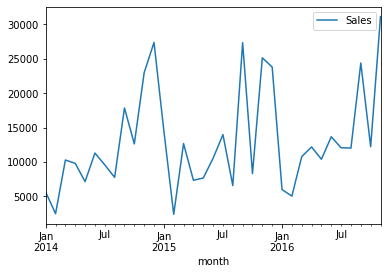

In [49]:
train.plot()

In [50]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(train.Sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.988981
p-value: 0.000000


# p value is much lower than 0.05 so we can asume the data to be stationary

C:\Python379\Scripts\pystudy\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


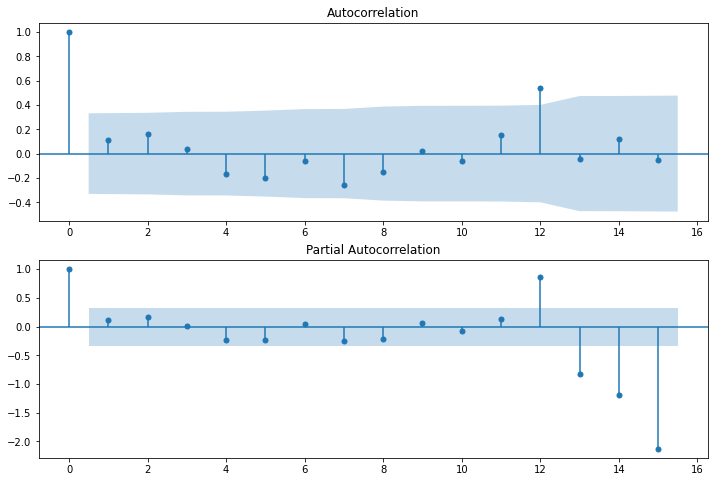

In [57]:
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(train['Sales'].dropna(),lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(train['Sales'].dropna(),lags=15,ax=ax2)

In [63]:
## ARIMA (1,0,1)
import statsmodels.api as sm

#from statsmodels.tsa.arima.model import ARIMA


model = sm.tsa.statespace.SARIMAX(train.Sales, order=(1,1,1),seasonal_order = (1,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

C:\Python379\Scripts\pystudy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Python379\Scripts\pystudy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Python379\Scripts\pystudy\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   35
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -221.841
Date:                            Sat, 26 Mar 2022   AIC                            453.683
Time:                                    03:45:23   BIC                            459.138
Sample:                                01-01-2014   HQIC                           454.968
                                     - 11-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6221      0.364     -1.709      0.087      -1.336       0.091
ma.L1          0.2664      0.374   

C:\Python379\Scripts\pystudy\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Python379\Scripts\pystudy\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


<AxesSubplot:xlabel='month'>

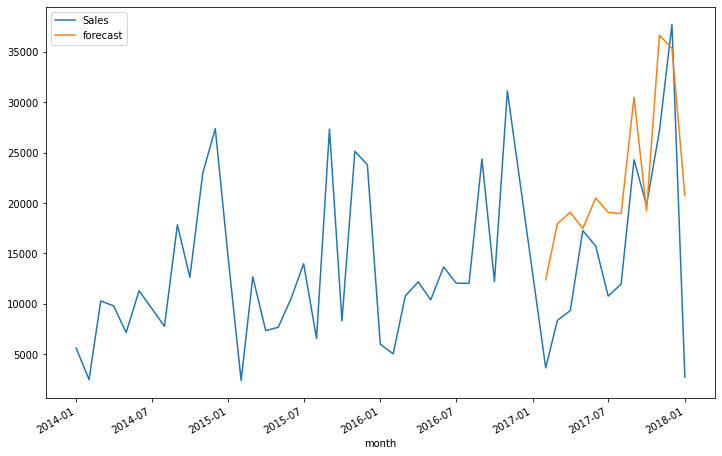

In [64]:
full_data = pd.concat([train, test], axis=0)
full_data['forecast'] = model_fit.predict(start = 36, end = 48, dynamic = True)
full_data.tail()
full_data[['Sales','forecast']].plot(figsize = (12,8))